In [ ]:
## computer vision libraries
#torchvision (other libraies also exist for their respective needs)
#torchvision.datasets
#torchvision.models which you can use while transfer learning
#torchvision.transforms-functions for manipulating your vision data
#torch.utils.data.Dataset- Base dataset class for pytorch
#torch.utils.data.DataLoader- Creates a Python iterable over a dataset

In [ ]:
## computer vision libraries

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

#from torch.utils.data import Dataset
#from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training datasets?
    download=True,# do we want to download yes/no
    transform=ToTensor(), # do we want to transform the data
    target_transform=None # how do we want to transform the label/targets
)
test_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=False, #
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.84MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.83MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.09MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# how mnay samples do we have
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image, label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#check the shape of our image
print(f"Image shape: {image.shape}->[colour_channels, height, width]")
print(f"Image labels: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])->[colour_channels, height, width]
Image labels: Ankle boot


Image shape: torch.Size([1, 28, 28])


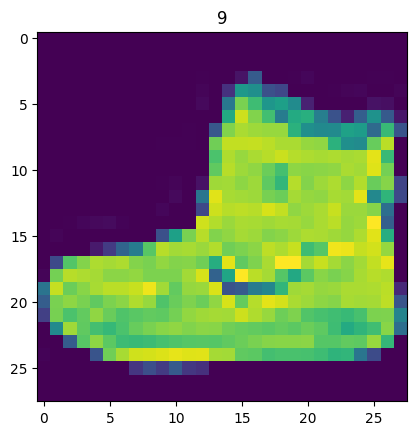

In [ ]:
import matplotlib.pyplot as plt
image, label= train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);
#image

(-0.5, 27.5, 27.5, -0.5)

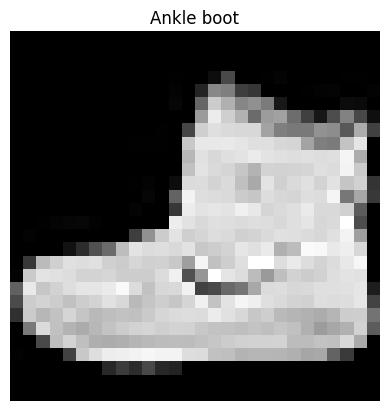

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

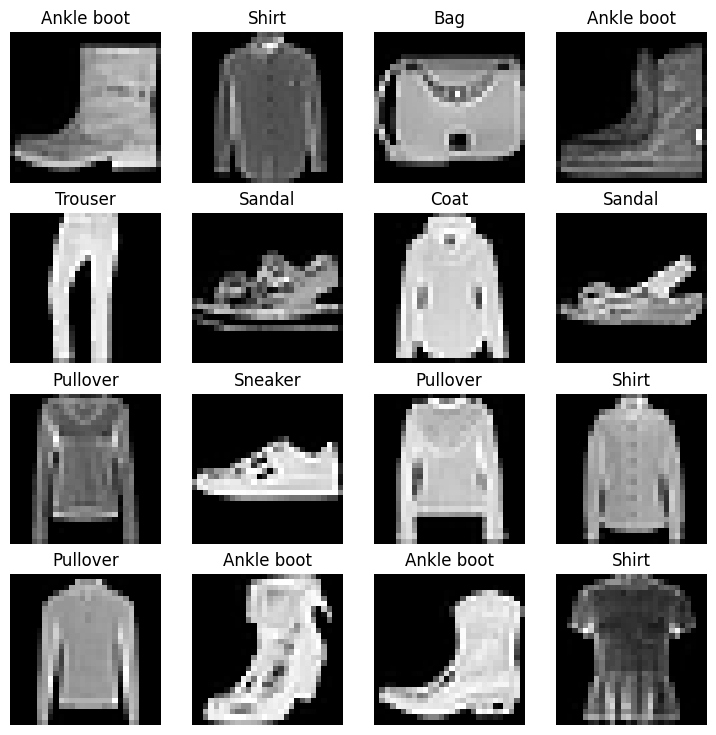

In [ ]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9, 9))
rows, cols=4, 4
for i in range(1, rows*cols+1):
    random_idx=torch.randint(0, len(train_data), size=[1]).item()

    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="grey")
    plt.title(class_names[label])
    plt.axis(False)


In [ ]:
train_data, test_data


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Dataloader
currently: data is in the form of pytorch datasets

next: dataloader turns our dataset into python iterables

apparently that means making minibatches out of our dataset:
1. makes it computationally efficient for our hardware
2. gives our neural network the ability to update the gradient much more often per epoch?

### minibatches

In [ ]:
from torch.utils.data import DataLoader

#setup the batch size
BATCH_SIZE=32

#turn dataseets into iterables
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False  #no need to shuffle our testdata, since the neural network is simply going to categorize on its own, and order isnt going to matter to it while testing it
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x787c434cda50>,
 <torch.utils.data.dataloader.DataLoader at 0x787d3545f890>)

In [ ]:
#checking what we've done and created

print(f"DataLoaders:{train_dataloader, test_dataloader}")
print(f"length of the train_dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"length of the test_dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders:(<torch.utils.data.dataloader.DataLoader object at 0x787c434cda50>, <torch.utils.data.dataloader.DataLoader object at 0x787d3545f890>)
length of the train_dataloader:1875 batches of 32...
length of the test_dataloader:313 batches of 32...


In [ ]:
# check out whats inside the training dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))#iter turns it into an iterable and we'll get the next batch with next
train_features_batch.shape, train_labels_batch.shape

# (torch.Size([32, 1, 28, 28]), torch.Size([32]))
# different resolution image: (torch.Size([32, 1, x, y ]), torch.Size([32]))
# more colour channels: (torch.Size([32, x, 28, 28]), torch.Size([32]))

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
label: 6, label size: torch.Size([])


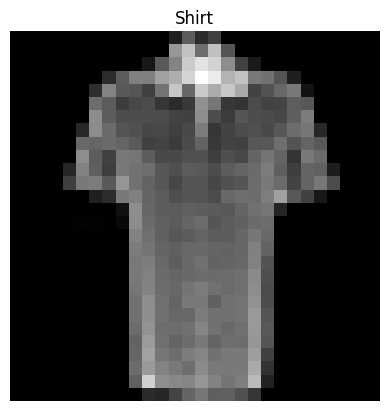

In [ ]:
#show a sample
torch.manual_seed(42)
random_idx=torch.randint(0, len(train_features_batch), size=[1]).item()
img, label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

## Our First Baseline model
we improve upon this one to get what we want

In [ ]:
#creating a flatten layer
flatten_model=nn.Flatten()

#get a single sample
x=train_features_batch[0]

#flatten the sample
output=flatten_model(x) # perform forward pass

#print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
   super().__init__()
   self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,
                out_features=hidden_units),
      nn.Linear(in_features=hidden_units,
                out_features=output_shape)

  )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, #this is 28*28
    hidden_units=10, #how many units in the hidden layer
    output_shape=len(class_names) #one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Loss Functions and optimizers
#### Loss function: since we're dealing with multi-class data, our loss function will be 'nn.CrossEntropyLoss()'
#### Optimizer- our optimizer 'torch.optim.SGD'(stochastic gradient descent)

-------

### Loss: Cross Entropy Loss
### Optimizer : SGD(stochastic gradient descent)
------


In [ ]:
import requests
from pathlib import Path

#download helper functions form learnpytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping the download...")
else:
  print("downloading the helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

downloading the helper_functions.py


In [ ]:
#importing accuracy function
from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

### creating a function to time our experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(

    start: float,
    end: float,
    device: torch.device = None):
 """Prints difference between start and end time"""
 total_time= end-start
 print(f"Train time on{device}: {total_time:.3f} seconds")
 return total_time

In [ ]:
start_time=timer()

#code

end_time=timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time oncpu: 0.000 seconds


4.54700000034336e-05

## Creating a training loop and training a model on batches of data

1. loop through epochs
2. loop through training batches, perform training steps, calculate the train loss per batch
3. loop through testing batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening
5. Time it all(for fun).


In [ ]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

#set the number of epochs(setting it small for now for quicker training time)
epochs=3

#create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### training
  train_loss=0
  #add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #forward pass?
    y_pred=model_0(X)

    #calculate the loss (per batch):
    loss=loss_fn(y_pred, y)
    train_loss= train_loss+loss

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step() #present in batch loop rather than the epoch loop, thus works per batch rather than each epoch

    #print out what's happening
    if batch % 400==0:
        print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  #divide total train loss by length of dataloader
  train_loss/=len(train_dataloader)

  #testing
  test_loss, test_acc=0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #1. forward pass
      test_pred=model_0(X_test)
      #2.calculate the loss(accumulatively)
      test_loss+=loss_fn(test_pred, y_test)
      #calculate the accuracy
      test_acc+=accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    #adjust metrics to get average loss and accuracy per batch
    test_loss/=len(test_dataloader)
    #calculate the test acc average per batch
    test_acc/=len(test_dataloader)
    #print out what's happening
    print(f"nTrain loss: {train_loss:.4f} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

  #calculate the training time
  train_time_end_on_cpu=timer()
  total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
nTrain loss: 0.5904 | test loss: 0.5095 | test acc: 82.0387
Train time oncpu: 12.503 seconds
Epoch: 1
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
nTrain loss: 0.4763 | test loss: 0.4799 | test acc: 83.1969
Train time oncpu: 21.782 seconds
Epoch: 2
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
nTrain loss: 0.4550 | test loss: 0.4766 | test acc: 83.4265
Train time oncpu: 30.038 seconds


##Make predictions and get model 0 results



In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on dataloader"""
  loss, acc=0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #make our data device agnostic
      #X, y = X.to(device), y.to(device)

      #make predictions
      y_pred= model(X)

      #accumulate the loss and acc values per batch
      loss+=loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #scale the loss and acc to find the averagw loss/acc pre batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc": acc}

#calculate the model0 results on the test dataset
model_0_results=eval_model(model=model_0,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model_0_results





  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Setup Device agnostic-code(for a gpu if there is one)

In [ ]:
!nvidia-smi
torch.cuda.is_available()

Tue Feb 11 15:17:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

True

In [ ]:
#setup device-agnostic code
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model 1

has non-linear and linear components

In [ ]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
   super().__init__()
   self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,
                out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,
                out_features=output_shape),
      nn.ReLU()

  )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
device

'cuda'

In [ ]:
#creating an instance of the model(its been set as a class)
torch.manual_seed(42)
model_1= FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Loss Function and optimizer

In [ ]:
#importing accuracy function
from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn=nn.CrossEntropyLoss() # meaures how wrong we are
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1) # "corrects" our "wrongness"

### "Functionizing" training and evaluation/testing loop
1. create a training loop, gonna call it train_step()
2. create a testing loop would like to call it test_step()


In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc=0, 0
  # putting model in training mode
  model.train()
#import tqdm for progress bar
####from tqdm.auto import tqdm



# putting model in training mode

#set the seed and start the timer
####torch.manual_seed(42)
####train_time_start_on_cpu=timer()

#set the number of epochs(setting it small for now for quicker training time)
####epochs=3

#create training and test loop
#####for epoch in tqdm(range(epochs)):
  #####print(f"Epoch: {epoch}\n------")
  ###---------- ---------------------training------------------------------------
  ####train_loss=0
  #add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    ####model_1.train()

    #put data on target device
    X, y=X.to(device), y.to(device)

    #forward pass?
    y_pred=model(X)

    #calculate the loss (per batch):
    loss=loss_fn(y_pred, y)
    train_loss+=loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))# go from logits to prediction labels

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step() #present in batch loop rather than the epoch loop, thus works per batch rather than each epoch

    #print out what's happening
    if batch % 400==0:
        print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  #divide total train loss and acc by length of dataloader
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"nTrain loss: {train_loss:.5f} | train acc: {train_acc:.2f}%")

  #testing
  ###test_loss, test_acc=0, 0
  ##model_0.eval()
  ##with torch.inference_mode():
  ##  for X_test, y_test in test_dataloader:
  ##    #1. forward pass
  ##    test_pred=model_0(X_test)
  ##    #2.calculate the loss(accumulatively)
  ##    test_loss+=loss_fn(test_pred, y_test)
  ##    #calculate the accuracy
  ##    test_acc+=accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
  ##  #adjust metrics to get average loss and accuracy per batch
  ##  test_loss/=len(test_dataloader)
  ##  #calculate the test acc average per batch
  ##  test_acc/=len(test_dataloader)
  ##  #print out what's happening
  ##  print(f"nTrain loss: {train_loss:.4f} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

  #calculate the training time
###  train_time_end_on_cpu=timer()
###  total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
###                                            end=train_time_end_on_cpu,
###                                            device=str(next(model_0.parameters()).device))

In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """Performs a testing with model trying to test on data_loader."""
  test_loss, test_acc=0, 0
  # putting model in training mode
  model.eval()


#testing
 # test_loss, test_acc=0, 0
 # model_1.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #send the data to the target device:
      X, y=X.to(device), y.to(device)

      #1. forward pass
      test_pred=model(X)
      #2.calculate the loss(accumulatively)
      test_loss+=loss_fn(test_pred, y)
      #calculate the accuracy
      test_acc+=accuracy_fn(y_true=y
                            , y_pred=test_pred.argmax(dim=1))
    #adjust metrics to get average loss and accuracy per batch
    test_loss/=len(data_loader)
    #calculate the test acc average per batch
    test_acc/=len(data_loader)
    #print out what's happening
    print(f"test loss: {test_loss:.2f} | test acc: {test_acc:.4f}%\n")


In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu=timer()


epochs=3


for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )
  test_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
nTrain loss: 0.59385 | train acc: 78.25%
test loss: 0.59 | test acc: 78.2467%

Epoch: 1
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
nTrain loss: 0.59385 | train acc: 78.25%
test loss: 0.59 | test acc: 78.2467%

Epoch: 2
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
nTrain loss: 0.59385 | train acc: 78.25%
test loss: 0.59 | test acc: 78.2467%

Train time oncuda:0: 42.485 seconds


In [ ]:
!nvidia-smi

Tue Feb 11 16:21:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P0             28W /   70W |     162MiB /  15360MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Sometimes cpu might be faster than your gpu
1. your gpu copying and compute to and fro from the cpu might negate the increased computing from the gpu.
2. your cpu hardware is simply better than your gpu hardware.

In [ ]:
# gert model_1 results dictionary
model_1_results=eval_model(model=model_1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6481072902679443,
 'model_acc': 76.8270766773163}

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on dataloader"""
  loss, acc=0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #make our data device agnostic
      X, y = X.to(device), y.to(device)

      #make predictions
      y_pred= model(X)

      #accumulate the loss and acc values per batch
      loss+=loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #scale the loss and acc to find the averagw loss/acc pre batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc": acc}

#calculate the model0 results on the test dataset
model_1_results=eval_model(model=model_1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model_1_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6481072902679443,
 'model_acc': 76.8270766773163}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# CNN (Convolutional Neural Network)

In [ ]:
#create a cnn
class FashionMNISTModelV2(nn.Module):
 """TinyVGG replicated/mimic model, model from CNN explainer website"""
 def __init__(self,
              input_shape: int,
              hidden_units: int,
              output_shape: int):
   super().__init__()
   self.conv_block_1=nn.Sequential(
       nn.Conv2d(in_channels=input_shape,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),# the above are the hyperparameters of the cnn
       nn.ReLU(),
       nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size=2)
   )
   self.conv_block_2=nn.Sequential(
       nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
       nn.ReLU(),
       nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size=2)

   )
   self.classifier=nn.Sequential(
       nn.Flatten(),
       nn.Linear(in_features=hidden_units*7*7,
                 out_features=output_shape)
   )

 def forward(self, x: torch.Tensor):
  x=self.conv_block_1(x)
  #print(x.shape)
  x=self.conv_block_2(x)
  #print(x.shape)
  x=self.classifier(x)
  return x

In [ ]:
torch.manual_seed(42)
model_2= FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

### Loss Function and Optimizer

In [ ]:
#setup loss functions/eval metrics/optimizer
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.1)

## Training and Testing
(using our trainnig and test functions we made during model_1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
train_time_start_model_2=timer()

#train and test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
nTrain loss: 0.23285 | train acc: 91.49%
test loss: 0.28 | test acc: 90.1957%

Epoch: 1
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
nTrain loss: 0.23080 | train acc: 91.69%
test loss: 0.27 | test acc: 90.0160%

Epoch: 2
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
nTrain loss: 0.22740 | train acc: 91.71%
test loss: 0.27 | test acc: 90.6250%

Train time oncuda: 34.037 seconds


In [ ]:
model_2_results=eval_model(model=model_2,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3045441210269928,
 'model_acc': 89.45686900958466}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6481072902679443,
 'model_acc': 76.8270766773163}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3045441210269928,
 'model_acc': 89.45686900958466}

### compare model results and training time

In [ ]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results["model_name"],
                              model_1_results["model_name"],
                              model_2_results["model_name"]])
                              #[model_0_results["model_loss"],
                               #model_1_results["model_loss"],
                               #model_2_results["model_loss"]])
compare_results

,0
0,FashionMNISTModelV0
1,FashionMNISTModelV1
2,FashionMNISTModelV2


from matplotlib import pyplot as plt
import seaborn as sns
compare_results.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)